# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [52]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

In [53]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")
#print(api_key)

In [54]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [55]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 9038


In [56]:
# Fetch the Ethereum news articles
ether_news = newsapi.get_everything(
    q="Ethereum",
    language="en"
)
print(f"Total articles about Ethereum: {ether_news['totalResults']}")

Total articles about Ethereum: 1817


In [57]:
def create_sentiment_data(information): 
    sentimentsList = []
    for article in information["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentimentsList.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                "Text": text

            })

        except AttributeError:
            pass

    return sentimentsList

In [58]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = create_sentiment_data(bitcoin_news)

#Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i..."


In [59]:
# Create the ethereum sentiment scores DataFrame
ether_sentiments = create_sentiment_data(ether_news)

#Create DataFrame
ether_df = pd.DataFrame(ether_sentiments)
ether_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...
4,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...


In [60]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.199928,0.019056,0.908778,0.072111
std,0.376340,0.035630,0.081887,0.086707
min,-0.503700,0.000000,0.647000,0.000000
25%,0.000000,0.000000,0.868750,0.000000
50%,0.177900,0.000000,0.919500,0.053500
75%,0.411575,0.024000,0.957250,0.098500
max,0.921700,0.114000,1.000000,0.353000


In [61]:
# Describe the Ethereum Sentiment
ether_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.005950,0.942750,0.051300
std,0.274088,0.026609,0.062097,0.054785
min,-0.340000,0.000000,0.818000,0.000000
25%,0.000000,0.000000,0.900000,0.000000
50%,0.012900,0.000000,0.949500,0.046500
75%,0.365100,0.000000,1.000000,0.082000
max,0.709600,0.119000,1.000000,0.144000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [62]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\kedar\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kedar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kedar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [64]:
# Complete the tokenizer function
def tokenizerFB(text):
    """Tokenizes text."""
    # Create a list of the words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    

    # Convert the words to lowercase
    for word in words:
        word = word.lower()      
    
    
    # Remove the punctuation
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    # Lemmatize Words into root words
    
    
    return tokens


In [65]:
# Add tokens to Dataframe
def addTokenstoDataFrame(articles, dataframe):
    word_tokenized = []
    words = []
        
    for article in articles:        
        words = words +  word_tokenize(article["text"])
        
    word_tokenized.append(words)
    dataframe["Tokens"] = words
    return datarame
    

In [66]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = bitcoin_df['Text'].apply(tokenizerFB)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, ha, acq..."


In [67]:
# Create a new tokens column for ethereum
ether_df['tokens'] = ether_df['Text'].apply(tokenizerFB)
ether_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
4,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...,"[first, christies, auction, digital, artwork, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [68]:
from collections import Counter
from nltk import ngrams

In [72]:
# Generate ngrams where N=2
def generateNGrams(dframe):    
    #join all the text together
    text_combined =  ' '.join([' '.join(i) for i in dframe['tokens']])
    ngram_count = Counter(ngrams(text_combined.split(' '), n=2))
    return ngram_count

In [73]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_ngramcount = generateNGrams(bitcoin_df)
type(bitcoin_ngramcount)

collections.Counter

In [74]:
# Generate the Ethereum N-grams where N=2
ether_ngramcount = generateNGrams(ether_df)
ether_ngramcount

Counter({('worried', 'geforce'): 1,
         ('geforce', 'rtx'): 1,
         ('rtx', 'sold'): 1,
         ('sold', 'cryptocurrency'): 1,
         ('cryptocurrency', 'miner'): 2,
         ('miner', 'snap'): 1,
         ('snap', 'every'): 1,
         ('every', 'gpu'): 1,
         ('gpu', 'sight'): 1,
         ('sight', 'nvidia'): 1,
         ('nvidia', 'think'): 1,
         ('think', 'ha'): 1,
         ('ha', 'simple'): 1,
         ('simple', 'way'): 1,
         ('way', 'help'): 1,
         ('help', 'make'): 1,
         ('make', 'new'): 1,
         ('new', 'card'): 1,
         ('card', 'unattractive'): 1,
         ('unattractive', 'crypto'): 1,
         ('crypto', 'crowd'): 1,
         ('crowd', 'char'): 1,
         ('char', 'coinbase'): 1,
         ('coinbase', 'plan'): 1,
         ('plan', 'go'): 1,
         ('go', 'public'): 1,
         ('public', 'way'): 1,
         ('way', 'direct'): 1,
         ('direct', 'listing'): 1,
         ('listing', 'company'): 1,
         ('company', 'anno

In [75]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [76]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_tokens = ' '.join([' '.join(i) for i in bitcoin_df['tokens']])
bitcoin_topwords = token_count(bitcoin_tokens.split(' '))
bitcoin_topwords

[('char', 18),
 ('bitcoin', 12),
 ('cryptocurrency', 8),
 ('tesla', 6),
 ('elon', 4),
 ('wa', 4),
 ('billion', 4),
 ('said', 4),
 ('ha', 4),
 ('company', 4)]

In [77]:
# Get the top 10 words for Ethereum
ether_tokens = ' '.join([' '.join(i) for i in ether_df['tokens']])
ether_topwords = token_count(ether_tokens.split(' '))
ether_topwords

[('char', 20),
 ('reuters', 15),
 ('ethereum', 13),
 ('cryptocurrency', 7),
 ('week', 7),
 ('bitcoin', 7),
 ('high', 7),
 ('new', 6),
 ('record', 6),
 ('february', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

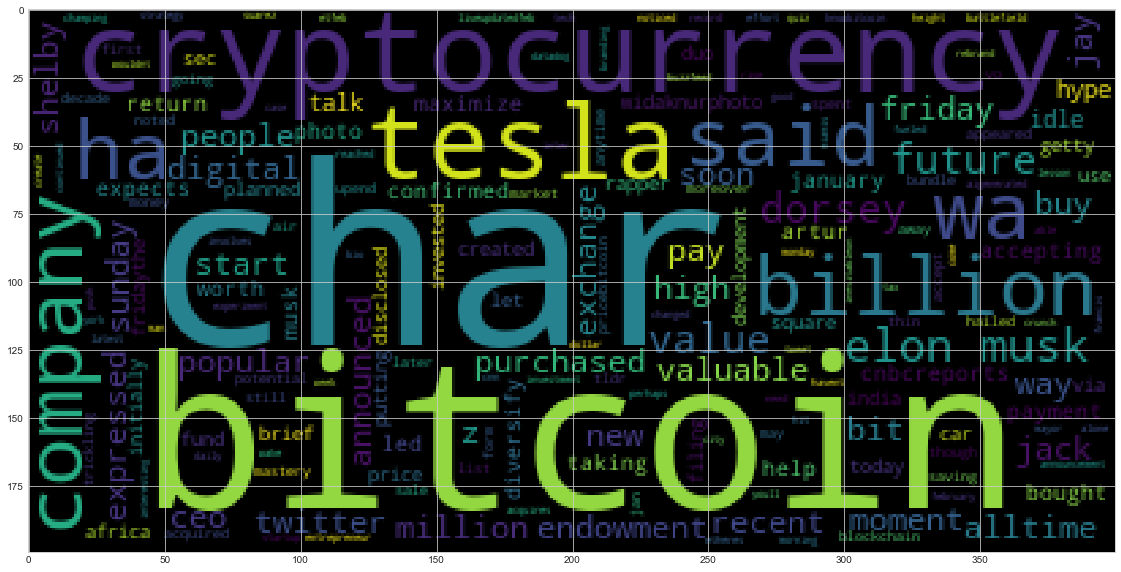

In [79]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_wordCloud = WordCloud().generate(bitcoin_tokens)
plt.imshow(bitcoin_wordCloud)

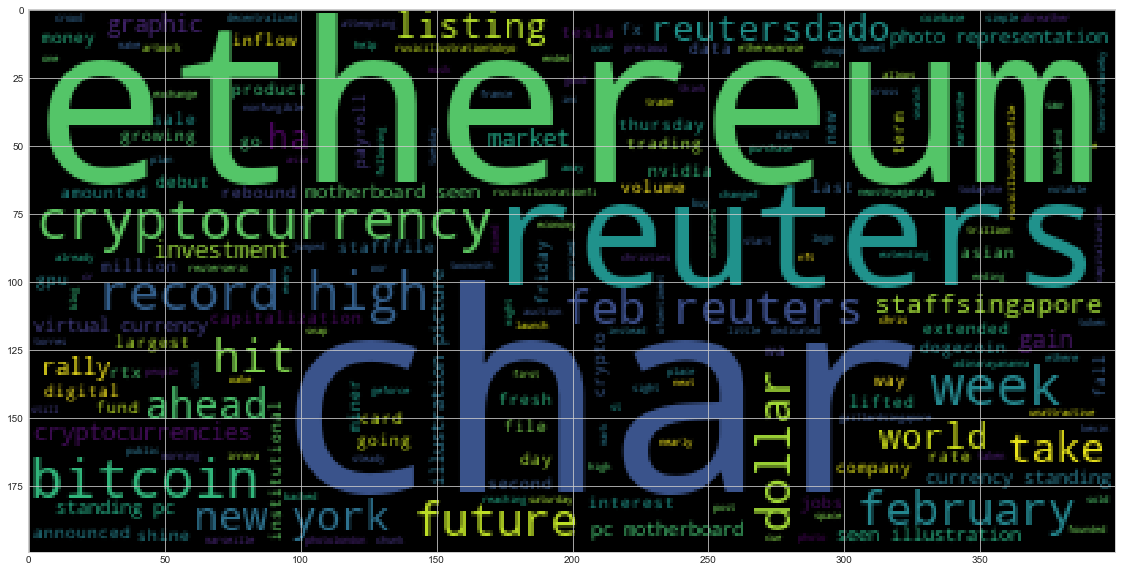

In [80]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ether_wordCloud = WordCloud().generate(ether_tokens)
plt.imshow(ether_wordCloud)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [81]:
import spacy
from spacy import displacy

In [82]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [83]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [84]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_tokens = ' '.join([' '.join(i) for i in bitcoin_df['tokens']])

In [85]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_info = nlp(bitcoin_tokens)

# Add a title to the document
# YOUR CODE HERE!
bitcoin_info.user_data["title"] = "Bitcoin NER"

In [86]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_info, style='ent')

In [87]:
# List all Entities
# YOUR CODE HERE!
bitcoin_info.ents

(billion,
 billion,
 sunday,
 billion,
 india,
 today,
 billion,
 first,
 money decade later,
 monday,
 daily,
 recent week,
 friday,
 friday,
 sunday,
 tuesday,
 million,
 seventh,
 million)

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ether_tokens = ' '.join([' '.join(i) for i in ether_df['tokens']])

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ether_info = nlp(ether_tokens)

# Add a title to the document
# YOUR CODE HERE!
ether_info.user_data["title"] = "Etherum NER"

In [36]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ether_info, style='ent')

In [40]:
# List all Entities
# YOUR CODE HERE!
ether_info.ents

NameError: name 'ether_info' is not defined